# Atividade 2 - Análise e Visualização de Dados - Análise Explanatória dos Dados

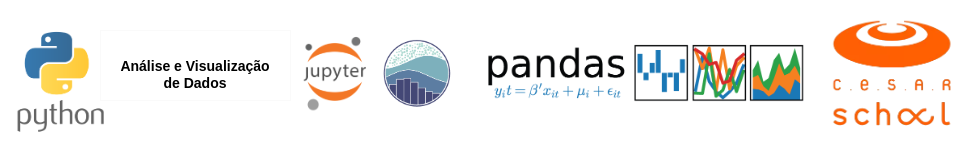

**Grupo**


*   Alberto de Moraes Barbosa (amb3@cesar.school)
*   Erick Anderson Ferreira Silva(eafs@cesar.school)
*   Hugo Vasconcelos Ferraz (hvfc@cesar.school)


# 1 - Importações

In [3]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import transforms, pyplot as plt
import seaborn as sns
import plotly.express as px
import textwrap
import warnings

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# receita = pd.read_csv('/content/drive/Shareddrives/Dados/Visualização/rendimentos-isentos-e-nao-tributaveis.csv', sep=';')

In [4]:
receita = pd.read_csv('rendimentos-isentos-e-nao-tributaveis.csv', sep=';')

In [5]:
receita.head()

,Ano Calendário,Faixa de Salários-Mínimos,"Bolsas de estudo e de pesquisa caracterizadas como doação, exceto médico-residente ou Pronatec, exclusivamente para proceder a estudos ou pesquisas e desde que os resultados dessas atividades não representem vantagem para o doador, nem importem contraprestação de serviços","Bolsas de estudo e de pesquisa caracterizadas como doação, quando recebidas exclusivamente para proceder a estudos ou pesquisas, recebidas por médico-residente e por servidor da rede pública de educação profissional, científica e tecnológica que participe das atividades do Pronatec","Capital das apólices de seguro ou pecúlio pago por morte do segurado, prêmio de seguro restituído em qualquer caso e pecúlio recebido de entidades de previdência privada em decorrência de morte ou invalidez permanente","Indenizações por rescisão de contrato de trabalho, inclusive a título de PDV, e por acidente de trabalho; e FGTS","Ganho de capital na alienação de bem, direito ou conjunto de bens ou direitos da mesma natureza, alienados em um mesmo mês, de valor total de alienação até R$ 20.000,00, para ações alienadas no mercado de balcão, e R$ 35.000,00, nos demais casos","Ganho de capital na alienação do único imóvel por valor igual ou inferior a R$ 440.000,00 e que, nos últimos 5 anos, não tenha efetuado nenhuma outra alienação de imóvel","Ganho de capital na venda de imóveis residenciais para aquisição, no prazo de 180 dias, de imóveis residenciais localizados no Brasil e redução sobre o ganho de capital","Ganho de capital na alienação de moeda estrangeira mantida em espécie cujo total de alienações, no ano-calendário, seja igual ou inferior ao equivalente a US$ 5,000.00",...,"Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações","Ganhos líquidos em operações com ouro, ativo financeiro, nas alienações realizadas até R$ 20.000,00 em cada mês","Rendimento bruto, até o máximo de 90%, da prestação de serviços decorrente do transporte de carga e com trator, máquina de terraplenagem, colheitadeira e assemelhados","Rendimento bruto, até o máximo de 40%, da prestação de serviços decorrente do transporte de passageiros",Restituição de imposto sobre a renda de anos-calendário anteriores,Outros,Parcela isenta correspondente à atividade rural,"Recuperação de prejuízos em Renda Variável (bolsa de valores, de mercadorias, de futuros e assemelhados e fundos de investimento imobiliário)",Demais Rend. isentos e não-tributáveis dos dependentes,"Benefícios ind. e reembolso desp. receb. voluntário Fifa, da Subsidiária Fifa Brasil ou Comitê Organizador Brasileiro (LOC)"
0,2020,Até 1/2,"48,81276313","12,99392111","7,66925054","1522,546074","27,02836822","0,77916638","0,96241566","0,40340154",...,"151,2313806","4,23106676","2,20752722","16,19243322","370,8569779","7244,897556","40,72832963","5,00983666","0,00659408",0
1,2020,De 1/2 a 1,"81,2265008","28,91079232","21,53044603","2307,265979","53,64741324","2,10877195","1,03012393","0,71908964",...,"157,742147","5,00837212","8,81188404","59,81245827","210,5350944","8040,335486","141,1119213","8,00762734","0,0120593",0
2,2020,De 1 a 2,"267,8818583","55,45210385","88,25605149","3360,606888","179,4412785","10,27345657","4,07344864","1,9384512",...,"254,4913927","10,53519452","43,9844561","120,4380731","242,5065746","10032,64293","611,5749087","19,30279977","0,00155117",0
3,2020,De 2 a 3,"358,2390444","171,675105","140,145674","2498,797983","262,8278302","18,02820749","7,14860394","2,07690205",...,"182,0464879","8,10416192","90,31935251","77,8501655","244,3956581","6911,56739","1068,001101","21,9483574","0,01029168",0
4,2020,De 3 a 5,"480,6428638","464,2499335","326,0079577","3816,077063","233,5250329","62,77515447","25,09719131","2,46100765",...,"238,2561345","12,03045631","342,5569111","62,45510058","206,7896816","8947,205021","3281,740045","41,81485486","0,07609103",0


In [ ]:
receita = receita.drop_duplicates()
colunas_objeto = receita.select_dtypes(include=['object']).columns
colunas_a_converter = colunas_objeto.difference([colunas_objeto[0]])
receita[colunas_a_converter] = receita[colunas_a_converter].apply(lambda x: x.str.replace(',', '.')).apply(pd.to_numeric, errors='coerce')
receita=receita[receita['Ano Calendário']>=2016]

ordem=['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3', 'De 3 a 5',
       'De 5 a 7', 'De 7 a 10', 'De 10 a 15', 'De 15 a 20', 'De 20 a 30',
       'De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160',
       'De 160 a 240', 'De 240 a 320', 'Mais de 320']

# Garantir que a coluna 'Faixa de Salários-Mínimos' seja categórica e ordenada
receita['Faixa de Salários-Mínimos'] = pd.Categorical(receita['Faixa de Salários-Mínimos'],categories=ordem,ordered=True)
receita.head()

,Ano Calendário,Faixa de Salários-Mínimos,"Bolsas de estudo e de pesquisa caracterizadas como doação, exceto médico-residente ou Pronatec, exclusivamente para proceder a estudos ou pesquisas e desde que os resultados dessas atividades não representem vantagem para o doador, nem importem contraprestação de serviços","Bolsas de estudo e de pesquisa caracterizadas como doação, quando recebidas exclusivamente para proceder a estudos ou pesquisas, recebidas por médico-residente e por servidor da rede pública de educação profissional, científica e tecnológica que participe das atividades do Pronatec","Capital das apólices de seguro ou pecúlio pago por morte do segurado, prêmio de seguro restituído em qualquer caso e pecúlio recebido de entidades de previdência privada em decorrência de morte ou invalidez permanente","Indenizações por rescisão de contrato de trabalho, inclusive a título de PDV, e por acidente de trabalho; e FGTS","Ganho de capital na alienação de bem, direito ou conjunto de bens ou direitos da mesma natureza, alienados em um mesmo mês, de valor total de alienação até R$ 20.000,00, para ações alienadas no mercado de balcão, e R$ 35.000,00, nos demais casos","Ganho de capital na alienação do único imóvel por valor igual ou inferior a R$ 440.000,00 e que, nos últimos 5 anos, não tenha efetuado nenhuma outra alienação de imóvel","Ganho de capital na venda de imóveis residenciais para aquisição, no prazo de 180 dias, de imóveis residenciais localizados no Brasil e redução sobre o ganho de capital","Ganho de capital na alienação de moeda estrangeira mantida em espécie cujo total de alienações, no ano-calendário, seja igual ou inferior ao equivalente a US$ 5,000.00",...,"Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações","Ganhos líquidos em operações com ouro, ativo financeiro, nas alienações realizadas até R$ 20.000,00 em cada mês","Rendimento bruto, até o máximo de 90%, da prestação de serviços decorrente do transporte de carga e com trator, máquina de terraplenagem, colheitadeira e assemelhados","Rendimento bruto, até o máximo de 40%, da prestação de serviços decorrente do transporte de passageiros",Restituição de imposto sobre a renda de anos-calendário anteriores,Outros,Parcela isenta correspondente à atividade rural,"Recuperação de prejuízos em Renda Variável (bolsa de valores, de mercadorias, de futuros e assemelhados e fundos de investimento imobiliário)",Demais Rend. isentos e não-tributáveis dos dependentes,"Benefícios ind. e reembolso desp. receb. voluntário Fifa, da Subsidiária Fifa Brasil ou Comitê Organizador Brasileiro (LOC)"
0,2020,Até 1/2,48.812763,12.993921,7.669251,1522.546074,27.028368,0.779166,0.962416,0.403402,...,151.231381,4.231067,2.207527,16.192433,370.856978,7244.897556,40.728330,5.009837,0.006594,0.0
1,2020,De 1/2 a 1,81.226501,28.910792,21.530446,2307.265979,53.647413,2.108772,1.030124,0.719090,...,157.742147,5.008372,8.811884,59.812458,210.535094,8040.335486,141.111921,8.007627,0.012059,0.0
2,2020,De 1 a 2,267.881858,55.452104,88.256051,3360.606888,179.441279,10.273457,4.073449,1.938451,...,254.491393,10.535195,43.984456,120.438073,242.506575,10032.642930,611.574909,19.302800,0.001551,0.0
3,2020,De 2 a 3,358.239044,171.675105,140.145674,2498.797983,262.827830,18.028207,7.148604,2.076902,...,182.046488,8.104162,90.319353,77.850166,244.395658,6911.567390,1068.001101,21.948357,0.010292,0.0
4,2020,De 3 a 5,480.642864,464.249933,326.007958,3816.077063,233.525033,62.775154,25.097191,2.461008,...,238.256135,12.030456,342.556911,62.455101,206.789682,8947.205021,3281.740045,41.814855,0.076091,0.0


# 2 - Insights

### Insight 1

### Houve crescimento e declínio nos rendimentos A DEPENDER da área da prestação de serviços decorrente do transporte de passageiros na pandemia

In [ ]:
data = receita.copy()
for i, column in enumerate(receita.columns[-9:], start=1):
        data = data.rename(columns={column: f'col{i}'})

data.columns[-9:]

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9'], dtype='object')

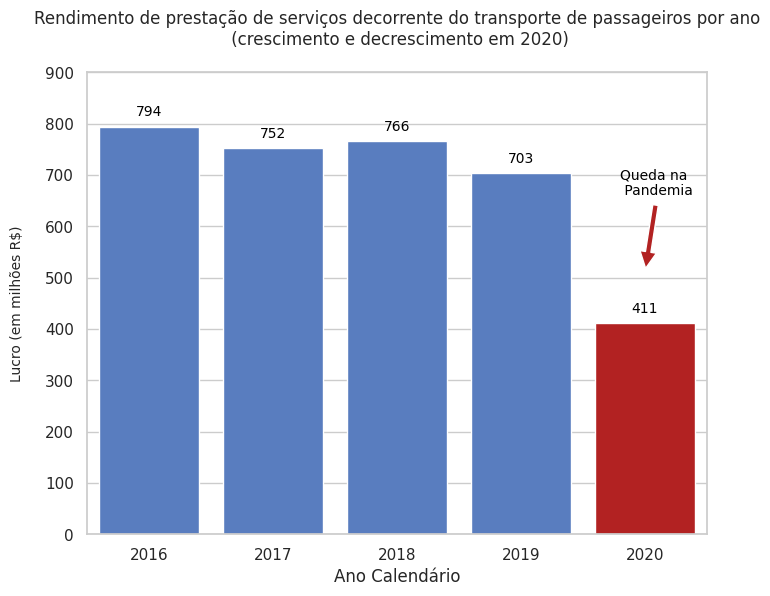

In [ ]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(8,6))

i_1 = data[['Ano Calendário','col3']].groupby('Ano Calendário').sum().reset_index()

ax = sns.barplot(x='Ano Calendário', y='col3', data=i_1)

for p in ax.patches:
    if p.get_x() == ax.patches[4].get_x():
        p.set_facecolor('#B22222')

    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 15,
            f'{p.get_height():.0f}',
            ha='center', va='bottom', fontsize=10, color='black')

x_pos = i_1[i_1['Ano Calendário'] == 2020].index[0]

y_pos = i_1[i_1['Ano Calendário'] == 2020]['col3'].values[0]

ax.annotate('Queda na \n Pandemia',
            xy=(x_pos, y_pos+100),
            xytext=(x_pos - 0.2, y_pos + 250),
            arrowprops=dict(facecolor='#B22222', shrink=0.05),
            fontsize=10, color='black')

ax.set_ylabel('Lucro (em milhões R$)', fontsize=10, labelpad=15)
ax.set_title("Rendimento de prestação de serviços decorrente do transporte de passageiros por ano\n (crescimento e decrescimento em 2020)",
          fontsize=12, pad=20)
ax.set_ylim(0,900)


plt.show()

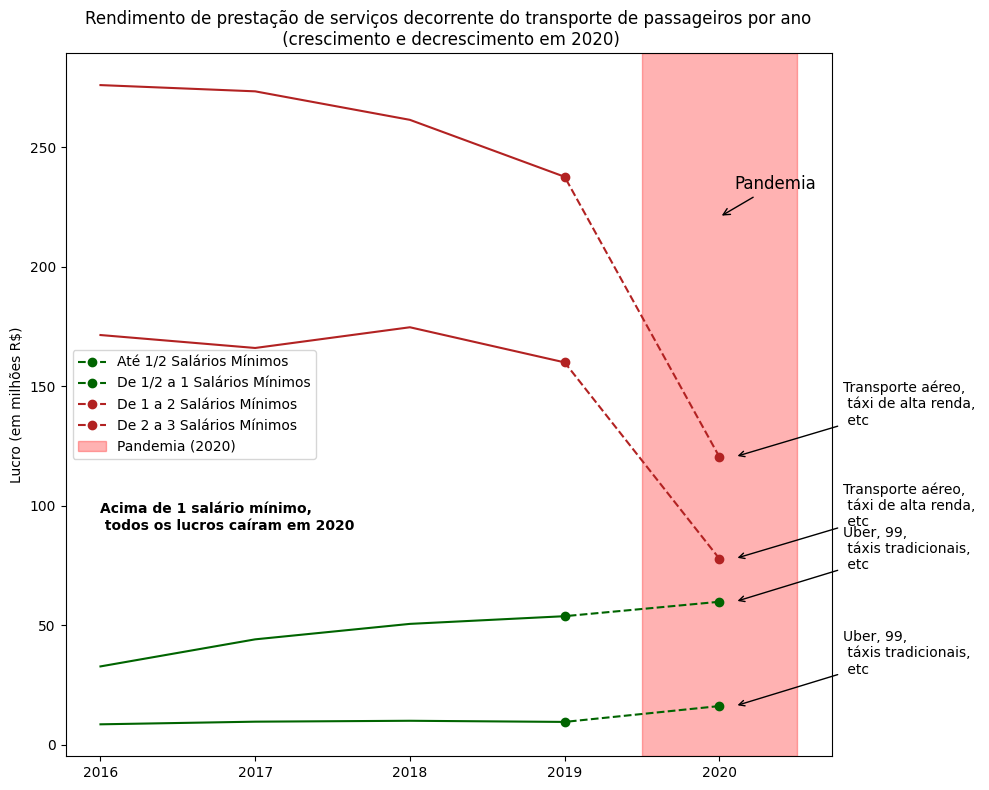

In [ ]:
plt.style.use('default')

plt.figure(figsize=(10, 8))

faixas = ['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3']
cores = ['#006400', '#006400', '#B22222', '#B22222']
labels = ['Até 1/2 Salários Mínimos', 'De 1/2 a 1 Salários Mínimos', 'De 1 a 2 Salários Mínimos', 'De 2 a 3 Salários Mínimos']

for faixa, cor, label in zip(faixas, cores, labels):
    dados_antes = data[(data['Faixa de Salários-Mínimos'] == faixa) & (data['Ano Calendário'] <= 2019)]
    dados_depois = data[(data['Faixa de Salários-Mínimos'] == faixa) & (data['Ano Calendário'] >= 2019)]

    plt.plot(dados_antes['Ano Calendário'], dados_antes['col3'], color=cor)
    plt.plot(dados_depois['Ano Calendário'], dados_depois['col3'], '--o', label=label, color=cor)


style = dict(size=10, color='black', weight='bold')

plt.text(2016, 90, "Acima de 1 salário mínimo, \n todos os lucros caíram em 2020", **style)

plt.axvspan(2020 - 0.5, 2020 + 0.5, color='red', alpha=0.3, label='Pandemia (2020)')

plt.annotate('Pandemia',
             xy=(2020, max(data['col3']) * 0.8),
             xytext=(2020 + 0.1, max(data['col3']) * 0.85),
             arrowprops=dict(facecolor='black', arrowstyle="->", lw=1),
             fontsize=12, color='black', horizontalalignment='left', verticalalignment='center')

for faixa, label in zip(['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3'],
                        ['Uber, 99, \n táxis tradicionais,\n etc', 'Uber, 99, \n táxis tradicionais,\n etc', 'Transporte aéreo, \n táxi de alta renda, \n etc', 'Transporte aéreo, \n táxi de alta renda, \n etc']):

    faixa_data = data[data['Faixa de Salários-Mínimos'] == faixa]
    ponto_2020 = faixa_data[faixa_data['Ano Calendário'] == 2020]


    if not ponto_2020.empty:
        x = ponto_2020['Ano Calendário'].iloc[0]
        y = ponto_2020['col3'].iloc[0]


        plt.annotate(f'{label}',
                     xy=(x+0.1, y),
                     xytext=(x + 0.8, y + 22),
                     arrowprops=dict(facecolor='black', arrowstyle="->", lw=1),
                     fontsize=10, color='black', horizontalalignment='left', verticalalignment='center')


plt.title("Rendimento de prestação de serviços decorrente do transporte de passageiros por ano\n (crescimento e decrescimento em 2020)")
# plt.xlabel("Ano Calendário")
plt.ylabel("Lucro (em milhões R$)")
plt.legend()

plt.tight_layout()
plt.show()

**Até 1 salário mínimo**
### Houve aumento de rendimento pelos seguintes motivos em 2020:

* Mudança na demanda e comportamento do consumidor: Durante a pandemia, muitas pessoas passaram a evitar o transporte público devido ao risco de contágio, preferindo opções mais seguras, como o transporte individual. Isso levou a um aumento na demanda por serviços de transporte por aplicativos (como Uber, 99 e outros), que são usados, em grande parte, por motoristas de baixa renda.

* Mesmo com restrições de mobilidade, o transporte de passageiros se manteve relevante para deslocamentos essenciais, e muitas pessoas estavam dispostas a pagar mais por viagens de forma mais segura.

* Muitos motoristas de aplicativos tiveram mais flexibilidade para trabalhar em horários alternativos ou em horários mais vantajosos, aproveitando a mudança nos padrões de mobilidade da população.

* Essa flexibilidade permitiu que esses trabalhadores, que muitas vezes dependem de uma jornada mais intensa ou de várias fontes de rendimento, conseguissem melhorar sua renda, ajustando-se à demanda e oferecendo mais disponibilidade de serviço.

"A pandemia do COVID-19 trouxe profundas mudanças na forma como as pessoas se movimentam pelas cidades e isso está refletido na pesquisa do Datafolha, encomendada pela Uber, para entender o futuro da mobilidade no País.  De acordo com o levantamento, 38% dos brasileiros que não possuem veículo próprio acreditam que a bicicleta é o meio mais seguro para se locomover, empatado tecnicamente pela margem de erro com aplicativos como Uber (35%), que vem logo em seguida. Táxi (9%) aparece depois em terceiro e o transporte público atingiu apenas 4% de preferência na opinião dos entrevistados."

Fonte: https://www.uber.com/pt-BR/newsroom/datafolha-bicicleta-e-apps-como-uber-sao-os-transportes-mais-seguros-durante-a-pandemia-para-brasileiros-sem-carro/

**Acima de 1 salário**

### Houve diminuição de rendimento pelos seguintes motivos em 2020:

* Redução da demanda: A pandemia provocou uma queda significativa na demanda por viagens e transportes de luxo ou não essenciais. Por exemplo, o setor de transporte aéreo sofreu uma queda drástica na quantidade de passageiros devido ao fechamento de fronteiras e à redução de viagens. Empresas de táxi de alta renda também enfrentaram queda nas corridas devido ao medo do contágio e à redução da mobilidade urbana.

"O Ministério da Economia publicou, no último dia 15 de setembro, uma lista com os setores da economia mais impactados pela pandemia do novo coronavírus. As atividades de transporte de passageiros estão entre os cinco segmentos com maior prejuízo durante a crise. O transporte aéreo encontra-se na segunda posição, seguido pelo transporte ferroviário e metroferroviário de passageiros, na terceira colocação; pelo transporte interestadual e intermunicipal de passageiros, na quarta; e pelo transporte público urbano, na quinta posição. O transporte rodoviário de cargas também figura na lista, ocupando a 27ª posição."

Fonte: https://cnt.org.br/agencia-cnt/segmentos-do-transporte-de-passageiros-entre-os-mais-afetados-pela-crise-da-covid-19

**OBS: Acima de 1 salário mínimo, todos os lucros caíram em 2020.**


### Insight 2

### Na pandemia houve um crescimento nas atividades rurais

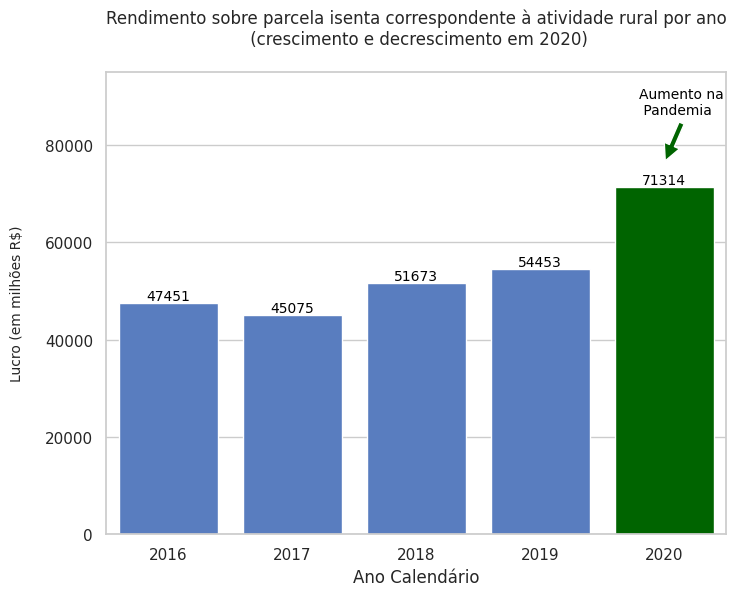

In [ ]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(8,6))

i_2 = data[['Ano Calendário','col6']].groupby('Ano Calendário').sum().reset_index()

ax = sns.barplot(x='Ano Calendário', y='col6', data=i_2)

for p in ax.patches:
    if p.get_x() == ax.patches[4].get_x():
        p.set_facecolor('#006400')

    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 15,
            f'{p.get_height():.0f}',
            ha='center', va='bottom', fontsize=10, color='black')

x_pos = i_2[i_2['Ano Calendário'] == 2020].index[0]

y_pos = i_2[i_2['Ano Calendário'] == 2020]['col6'].values[0]

ax.annotate('Aumento na \n Pandemia',
            xy=(x_pos, y_pos+5000),
            xytext=(x_pos - 0.2, y_pos + 15000),
            arrowprops=dict(facecolor='#006400', shrink=0.05),
            fontsize=10, color='black')

ax.set_ylabel('Lucro (em milhões R$)', fontsize=10, labelpad=15)
ax.set_title("Rendimento sobre parcela isenta correspondente à atividade rural por ano\n (crescimento e decrescimento em 2020)",
          fontsize=12, pad=20)
ax.set_ylim(0,95000)


plt.show()

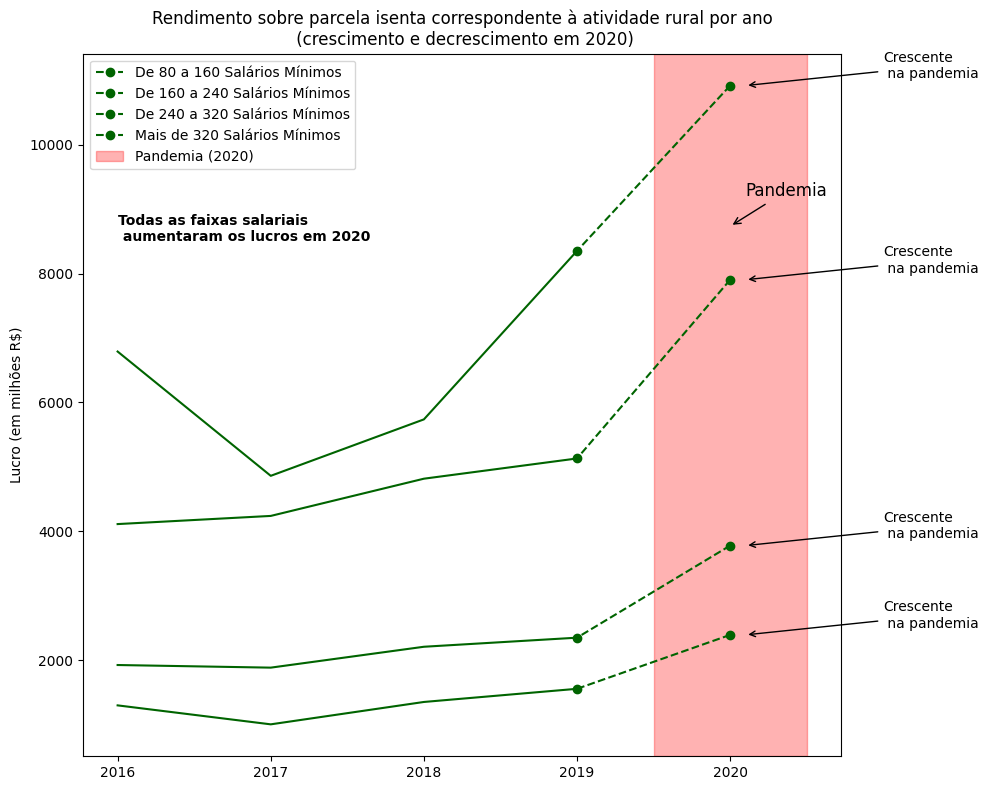

In [ ]:
plt.style.use('default')

plt.figure(figsize=(10, 8))

faixas = ['De 80 a 160', 'De 160 a 240', 'De 240 a 320', 'Mais de 320']
cores = ['#006400', '#006400', '#006400', '#006400']
labels = ['De 80 a 160 Salários Mínimos', 'De 160 a 240 Salários Mínimos', 'De 240 a 320 Salários Mínimos',
          'Mais de 320 Salários Mínimos']

for faixa, cor, label in zip(faixas, cores, labels):
    dados_antes = data[(data['Faixa de Salários-Mínimos'] == faixa) & (data['Ano Calendário'] <= 2019)]
    dados_depois = data[(data['Faixa de Salários-Mínimos'] == faixa) & (data['Ano Calendário'] >= 2019)]

    plt.plot(dados_antes['Ano Calendário'], dados_antes['col6'], color=cor)
    plt.plot(dados_depois['Ano Calendário'], dados_depois['col6'], '--o', label=label, color=cor)


plt.axvspan(2020 - 0.5, 2020 + 0.5, color='red', alpha=0.3, label='Pandemia (2020)')

plt.annotate('Pandemia',
             xy=(2020, max(data['col6']) * 0.8),
             xytext=(2020 + 0.1, max(data['col6']) * 0.85),
             arrowprops=dict(facecolor='black', arrowstyle="->", lw=1),
             fontsize=12, color='black', horizontalalignment='left', verticalalignment='center')

for faixa, label in zip(['De 80 a 160', 'De 160 a 240', 'De 240 a 320', 'Mais de 320'],
                        ['Crescente\n na pandemia', 'Crescente\n na pandemia', 'Crescente\n na pandemia', 'Crescente\n na pandemia']):
    faixa_data = data[data['Faixa de Salários-Mínimos'] == faixa]
    ponto_2020 = faixa_data[faixa_data['Ano Calendário'] == 2020]

    if not ponto_2020.empty:
        # eixo x é número, logo usamos o valor para localizar a seta
        x = ponto_2020['Ano Calendário'].iloc[0]
        y = ponto_2020['col6'].iloc[0]

        plt.annotate(f'{label}',
                     xy=(x+0.1, y),
                     xytext=(x + 1, y + 300),
                     arrowprops=dict(facecolor='black', arrowstyle="->", lw=1),
                     fontsize=10, color='black', horizontalalignment='left', verticalalignment='center')


style = dict(size=10, color='black', weight='bold')
plt.text(2016, 8500, "Todas as faixas salariais \n aumentaram os lucros em 2020", **style)

plt.title("Rendimento sobre parcela isenta correspondente à atividade rural por ano\n (crescimento e decrescimento em 2020)")
# plt.xlabel("Ano Calendário")
plt.ylabel("Lucro (em milhões R$)")
plt.legend()

plt.tight_layout()
plt.show()

### Na pandemia houve um crescimento nas atividades rurais devido aos fatores abaixo:

* Demanda externa: O Brasil é um grande exportador de produtos agrícolas, como soja, milho, carne, entre outros. Durante a pandemia, muitos países continuaram importando esses produtos, o que impulsionou as exportações brasileiras, principalmente a países como China.

* Setor essencial: A agricultura foi considerada um setor essencial durante a pandemia, o que permitiu que a produção continuasse mesmo com as restrições impostas em outros setores da economia.

* Percebemos que o setor rural beneficia mais quem tem maiores rendas por serem proprietários de terras, logo é autoexplicativo as maiore rendas.


Produtores e economistas consultados pelo G1 afirmam que os fatores ajudaram a impulsionar o agro em 2020 foram:
* A safra recorde de grãos de 257,8 milhões de toneladas em 2019/2020;
* Investimento dos produtores em pacotes tecnológicos avançados - sementes, defensivos, fertilizantes e rações de maior qualidade;
* Clima favorável;
* Demanda externa aquecida - receio de desabastecimento de alimentos por causa do fechamento de fronteiras * impulsionou importações dos países. E Brasil é um grande exportador do setor;
* Agro foi considerado uma atividade essencial durante a pandemia para evitar falta de mantimentos;
* Auxílio emergencial aqueceu a demanda interna;
* Valorização do dólar em relação ao real impulsionou exportações do agro;
* Recomposição do rebanho suíno chinês após peste suína africana puxou vendas de soja e milho do Brasil - grãos viram ração para os animais;
* Aumento da produção e exportação de carnes.

Fonte: https://g1.globo.com/economia/agronegocios/noticia/2021/03/03/agropecuaria-foi-o-unico-setor-que-cresceu-no-pib-de-2020-entenda.ghtml

### Insight 3

### Recebimento de Lucros e dividendos por Classe Social entre 2016 e 2020

In [ ]:
df1=pd.DataFrame()
df1 = receita.copy()
classe_dicionario =  {'Até 1/2' : 'Classe E', 'De 1/2 a 1' : 'Classe E', 'De 1 a 2' : 'Classe E', 'De 2 a 3' : 'Classe D', 'De 3 a 5': 'Classe D',
       'De 5 a 7' : 'Classe C', 'De 7 a 10' : 'Classe C', 'De 10 a 15' : 'Classe B', 'De 15 a 20' : 'Classe B', 'De 20 a 30' : 'Classe A',
       'De 30 a 40': 'Classe A', 'De 40 a 60': 'Classe A', 'De 60 a 80': 'Classe A', 'De 80 a 160': 'Classe A',
       'De 160 a 240': 'Classe A', 'De 240 a 320': 'Classe A', 'Mais de 320': 'Classe A'}
df1['Classe'] = df1['Faixa de Salários-Mínimos'].map(classe_dicionario)

In [ ]:
Y1 = df1.groupby('Classe')['Lucros e dividendos recebidos'].sum()
soma_total = Y1.sum()
Y_percentual = Y1 / soma_total * 100
Y1 = pd.DataFrame({'Lucros e dividendos recebidos': Y1, 'Percentual': Y_percentual})

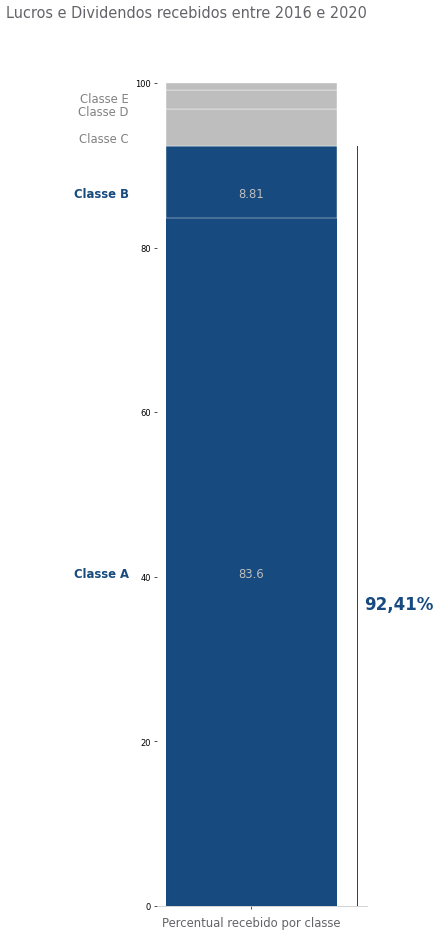

In [ ]:
warnings.filterwarnings('ignore')

warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

GRAY_COLORS = ['#231F20', '#414040', '#555655', '#646369', '#76787B', '#828282', '#929497', '#A6A6A5', '#BFBEBE']
BLUE_COLORS = ['#174A7E', '#4A81BF', '#94B2D7', '#94AFC5', '#92CDDD', '#2E869D']

Y1 = df1.groupby('Classe')['Lucros e dividendos recebidos'].sum()
soma_total = Y1.sum()
Y_percentual = Y1 / soma_total * 100
Y1 = pd.DataFrame({'Lucros e dividendos recebidos': Y1, 'Percentual': Y_percentual})

X = Y1.index
Y = Y1['Percentual']

fig, ax1 = plt.subplots(figsize=(5, 18), dpi=60)

fig.subplots_adjust(left=0.15, right=0.85, top=0.90, bottom=0.1)

C = [BLUE_COLORS[0]] * 2 + [GRAY_COLORS[8]] * 3
CT = [GRAY_COLORS[8]] * 2 + [BLUE_COLORS[0]] * 3
CL = [BLUE_COLORS[0]] * 2 + [GRAY_COLORS[5]] * 3

bottom = np.zeros(len(X))
for i in range(len(X)):
    bars = plt.bar([0], Y[i], bottom=bottom[i], color=C[i], edgecolor=('white', 'none')[i == 0], linewidth=0.5, width=0.5)

    ax1.text(-0.36, Y[i] / 2 + bottom[i] - 1.9, X[i], fontsize=14, ha='right', color=CL[i], fontweight=('normal', 'bold')[CL[i] == BLUE_COLORS[0]])

    for bi, b in enumerate(bars):
        if i<=1:
          value = Y[i]
          ax1.text(b.get_x() + b.get_width() / 2, b.get_y() + b.get_height() / 2 - 1.9, str(round(value, 2)), fontsize=14, ha='center', color=CT[i])

    bottom += Y[i]

ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='on')
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.xticks([0], ['Percentual recebido por classe'])

for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY_COLORS[3])
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

ax1.spines['bottom'].set_color(GRAY_COLORS[8])

ax1.text(-0.72, 108, 'Lucros e Dividendos recebidos entre 2016 e 2020', color=GRAY_COLORS[3], fontsize=17.4)

ax1.axvline(0.31, ymin=0.0, ymax=0.88, color=BLUE_COLORS[0], linewidth=1.2)

ax1.text(0.33, 36, '92,41%', fontweight='bold', fontsize=20, color=BLUE_COLORS[0])

plt.show()

**Observação** - As classes A e B representam 92,41% de todas as receitas de lucros e dividendos. As empresas nestas classes são frequentemente mais sólidas e consolidadas no mercado. Tendem a ser maiores, com mais lucros e, por consequência, distribuem dividendos mais elevados.

### Insight 4

### Indenizações por rescisão de contrato de trabalho por Classe Social de 2016 a 2020

In [ ]:
df2 = receita.copy()
classe_dicionario =  {'Até 1/2' : 'Classe E', 'De 1/2 a 1' : 'Classe E', 'De 1 a 2' : 'Classe E', 'De 2 a 3' : 'Classe D', 'De 3 a 5': 'Classe D',
       'De 5 a 7' : 'Classe C', 'De 7 a 10' : 'Classe C', 'De 10 a 15' : 'Classe B', 'De 15 a 20' : 'Classe B', 'De 20 a 30' : 'Classe A',
       'De 30 a 40': 'Classe A', 'De 40 a 60': 'Classe A', 'De 60 a 80': 'Classe A', 'De 80 a 160': 'Classe A',
       'De 160 a 240': 'Classe A', 'De 240 a 320': 'Classe A', 'Mais de 320': 'Classe A'}
df2['Classe'] = df2['Faixa de Salários-Mínimos'].map(classe_dicionario)

Y1 = df2.groupby('Classe')['Indenizações por rescisão de contrato de trabalho, inclusive a título de PDV, e por acidente de trabalho; e FGTS'].sum()
soma_total = Y1.sum()
Y_percentual = Y1 / soma_total * 100
Y1 = pd.DataFrame({'Lucros e dividendos recebidos': Y1, 'Percentual': Y_percentual})

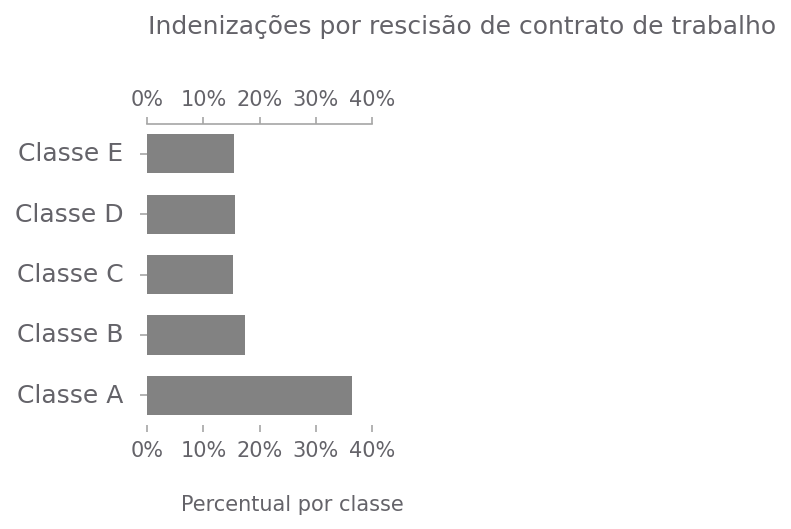

In [ ]:
X = Y1.index
Y = Y1['Percentual']
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=150)
fig.subplots_adjust(left=0.28, right=0.53, top=0.61, bottom=0.107)
ax1.barh(X, Y, height=0.65, color=[GRAY_COLORS[5]]*5)
ax1.grid(False)
ax1.set_xlim([0, 40])
ax1.set_ylim([-0.5, 4.5])
plt.setp(ax1,
         xticks=[0, 10, 20, 30, 40],
         xticklabels=['0%', '10%', '20%', '30%', '40%'],
         yticks=np.arange(len(X)),
         yticklabels=X)
ax1.tick_params(top='on', bottom='off', left='off',
                labelbottom='off', labeltop='on')
for item in ax1.get_xticklabels():
    item.set_color(GRAY_COLORS[3])
for item in ax1.get_yticklabels():
    item.set_fontsize(12)
    item.set_color(GRAY_COLORS[3])
    # use trasformations to shift y tick labels
    # left y labels slightly right, and right labels slightly left
    offset = transforms.ScaledTranslation(-0.06, 0.02, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)
ax1.tick_params(color=GRAY_COLORS[7])
ax1.spines['top'].set_color(GRAY_COLORS[7])
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.text(6, -1.9,'Percentual por classe',fontsize=10,color=GRAY_COLORS[3])
ax1.text(0.2, 6, 'Indenizações por rescisão de contrato de trabalho', color=GRAY_COLORS[3], fontsize=12)

plt.show()

**Observação:** A classe A representa cerca de 35% dos valores totais das indenizações por rescisão de contrato de trabalho e é o dobro do que recebem as demais classes de forma individual, embora a Classe A, segundo o IBGE, representa apenas 3% da população, o que mostra a alta concentração de renda em nosso país.


### Insight 5

### Ganhos líquidos em operações no mercado à vista de ações até 20.000,00 reais por ano e por classe social

In [ ]:
df1=pd.DataFrame()
df1 = receita.copy()
classe_dicionario =  {'Até 1/2' : 'Classe E', 'De 1/2 a 1' : 'Classe E', 'De 1 a 2' : 'Classe E', 'De 2 a 3' : 'Classe D', 'De 3 a 5': 'Classe D',
       'De 5 a 7' : 'Classe C', 'De 7 a 10' : 'Classe C', 'De 10 a 15' : 'Classe B', 'De 15 a 20' : 'Classe B', 'De 20 a 30' : 'Classe A',
       'De 30 a 40': 'Classe A', 'De 40 a 60': 'Classe A', 'De 60 a 80': 'Classe A', 'De 80 a 160': 'Classe A',
       'De 160 a 240': 'Classe A', 'De 240 a 320': 'Classe A', 'Mais de 320': 'Classe A'}
df1['Classe'] = df1['Faixa de Salários-Mínimos'].map(classe_dicionario)

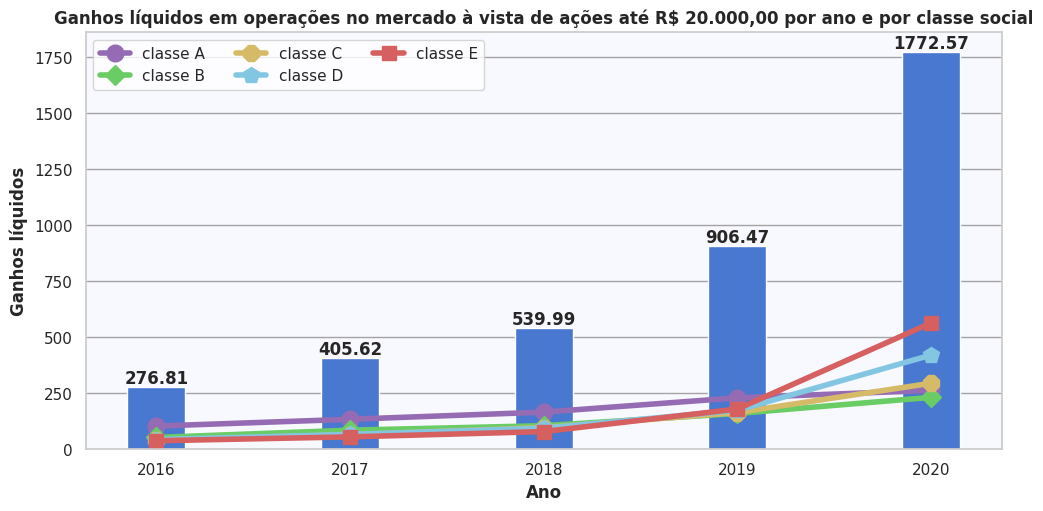

In [ ]:
x = np.arange(len(df1['Ano Calendário'].unique()))  
width = 0.15  
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

ax.plot(sorted(df1['Ano Calendário'].unique()),df1[df1['Classe']=='Classe A'].groupby(['Classe','Ano Calendário'])['Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações'].sum(),'o-m',linewidth=4, markersize=12, label='classe A',)
ax.plot(sorted(df1['Ano Calendário'].unique()),df1[df1['Classe']=='Classe B'].groupby(['Classe','Ano Calendário'])['Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações'].sum(),'D-g',linewidth=4, markersize=10, label='classe B')
ax.plot(sorted(df1['Ano Calendário'].unique()),df1[df1['Classe']=='Classe C'].groupby(['Classe','Ano Calendário'])['Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações'].sum(),'8-y',linewidth=4, markersize=12, label='classe C')
ax.plot(sorted(df1['Ano Calendário'].unique()),df1[df1['Classe']=='Classe D'].groupby(['Classe','Ano Calendário'])['Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações'].sum(),'p-c',linewidth=4, markersize=12, label='classe D')
ax.plot(sorted(df1['Ano Calendário'].unique()),df1[df1['Classe']=='Classe E'].groupby(['Classe','Ano Calendário'])['Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações'].sum(),'s-r',linewidth=4, markersize=10, label='classe E')
p=ax.bar(sorted(df1['Ano Calendário'].unique()),df1.groupby('Ano Calendário')['Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações'].sum(), width=0.3)
ax.bar_label(p,fmt='%.2f', label_type='edge', weight='bold')

ax.set_ylabel('Ganhos líquidos', weight='bold')
ax.set_xlabel('Ano', weight='bold')
ax.set_title('Ganhos líquidos em operações no mercado à vista de ações até R$ 20.000,00 por ano e por classe social', weight='bold')

ax.legend(loc='upper left', ncols=3)
ax.set_facecolor('#F8F8FF')
plt.grid(axis='y', linestyle='-', color='gray', alpha=0.7)
plt.grid(visible=None,axis='x')


plt.show()